## FontStyleGAN


### Setup

In [1]:
%load_ext autoreload
%autoreload 2

# matplot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# The folliwing line is useful in Jupyter notebook
%matplotlib inline

torch.Size([1, 16, 416])


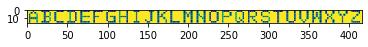

In [2]:
from data.font_dataset import FontDataset
from data.font_data_loader import FontDataLoader

dataset = FontDataset('./datasets/fonts/')

import torchvision.transforms as transforms

print(dataset[0].shape)

# Show what a normalized image looks like.
plt.imshow(transforms.Compose([
    transforms.ToPILImage()
])(dataset[0]))

torch.Size([16, 16])


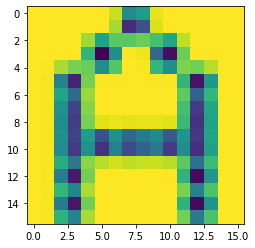

In [3]:
single_image = dataset[0][0,:,0:16]
print(single_image.shape)

# Sample a specific image
plt.imshow(transforms.Compose([
    transforms.ToPILImage()
])(single_image))

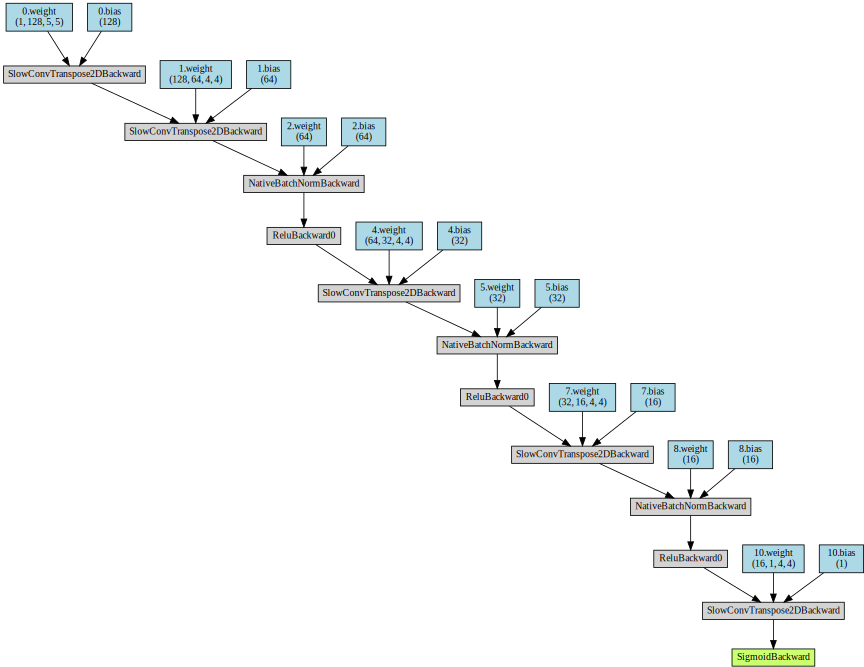

In [10]:
from models.models import build_font_shape_generator, build_font_shape_discriminator
from torchviz import make_dot

G = build_font_shape_generator()

data_loader = FontDataLoader(dataset, batch_size=5)
for a in data_loader:
    generated = G(a)
    dot = make_dot(generated, params=dict(G.named_parameters()))
    
#     plt.imshow(transforms.Compose([
#         transforms.ToPILImage()
#     ])(generated[0]))
    break

# make_dot(G(x), params=dict(model.named_parameters()))
dot